In [ ]:
#On utilise la fonction curve fit pour fitter les données MC reconstruites avec une Crystal Ball 2

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit
import uproot
import awkward as ak
import hist
import vector
print("uproot version",uproot.__version__)
print("awkward version",ak.__version__)
print("numpy version",np.__version__)
print("matplotlib version",matplotlib.__version__)
print("hist version",hist.__version__)
print("vector version",vector.__version__)

uproot version 4.1.9
awkward version 1.10.2
numpy version 1.23.5
matplotlib version 3.4.3
hist version 2.5.2
vector version 0.8.5


In [2]:
!curl 'https://cernbox.cern.ch/remote.php/dav/public-files/nbPmKbcsJvZrjjx/291694/AnalysisResults.root' > run291694.mc.root

!file *.root
file = uproot.open("run291694.mc.root")

events = file["eventsTree"]
gen = file["genTree"]

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 6915k  100 6915k    0     0  1515k      0  0:00:04  0:00:04 --:--:-- 2086k
run290223.data.root: ROOT file Version 62406 (Compression: 1)
run290223.mc.root:   ROOT file Version 62406 (Compression: 1)
run291694.data.root: ROOT file Version 61600 (Compression: 1)
run291694.mc.root:   ROOT file Version 61600 (Compression: 1)


In [22]:
def CB1(x,mu,sigma,alpha,n):
    A = (n/abs(alpha))**n*np.exp(-abs(alpha)**2/2)
    B = n/abs(alpha) - abs(alpha)
    C = n/abs(alpha)*1/(n-1)*np.exp(-abs(alpha)**2/2)
    D = np.sqrt(math.pi/2)*(1+math.erf(abs(alpha)/np.sqrt(2)))
    N = 1/(sigma*(C + D))
    if ((x-mu)/sigma>-alpha).all:
        return np.exp(-(x-mu)**2/(2*sigma**2))
    elif ((x-mu)/sigma<=-alpha).all:
        return A*(B - (x-mu)/sigma)**(-n) 

In [142]:

def CrystalBallB2(x,mu,sigma,alpha, alpha1,n,n1,N):
    A = (n/abs(alpha))**n * np.exp(-abs(alpha)**2/2)
    B = n/abs(alpha)- abs(alpha)
    C = (n1/abs(alpha1))**n1 * np.exp(-abs(alpha1)**2/2)
    D = n1/abs(alpha1)-abs(alpha1)
    if ((x-mu)/sigma > alpha).any() and ((x-mu)/sigma<alpha1).any():
        return np.exp(-(x-mu)**2/(2*sigma**2))
    elif ((x-mu)/sigma <= alpha).any():
        return A*(B - (x-mu)/sigma)**(-n)
    elif ((x-mu)/sigma >= alpha1).any():
        return C*(D + (x-mu)/sigma)**(-n1)
        """
def CrystalBall2(x, mu, sigma, alpha, alphabis, n, nbis, N):
    A = ((n/np.abs(alpha))**n)*np.exp(-(np.abs(alpha)**2)/2.)
    B = (n/np.abs(alpha))-np.abs(alpha)
    C = ((n/np.abs(alphabis))**n)*np.exp(-(np.abs(alphabis)**2)/2.)
    D = (n/np.abs(alphabis))-np.abs(alphabis)
    y = np.array([], dtype=float)
    for i in x:
        if((i > alpha) and (i < alphabis)):
            y = np.append(y, np.exp(-((i-mu)**2)/(2*sigma**2)))
        elif (i < alpha):
            y = np.append(y, A*((B- (i -mu)/(sigma))**(-n)))
        elif(i > alphabis):
            y = np.append(y, C*((D- (i -mu)/(sigma))**(-nbis)))
        else:
            y = np.append(y, 0.)
    return y*N
"""

In [83]:
#NA60
def NA60(x,mu,sigma,alpha_L,alpha_R,p1_L,p1_R,p2_L,p2_R,p3_L,p3_R):
    t = (x-mu)/sigma
    t0=1
    if (t<alpha_L).all():
        t0 = 1+p1_L*(alpha_L - t)**(p2_L - p3_L*np.sqrt(alpha_L - t))
    elif (t>=alpha_L).all() and (t<=alpha_R).all():
        t0=1
    elif (t>alpha_R).all():
        t0 = 1+p1_R*(t - alpha_R)**(p2_R - p3_R*np.sqrt(t - alpha_R))
    return N*np.exp(-0.5*t**2/t0**2)

In [154]:
#Gaussienne
def gauss(x,m,sigma,N):
    return N/(np.sqrt(2*math.pi)*sigma)*np.exp(-(x-m)**2/(2*sigma**2))

In [6]:
#Fonction background Variable Width Gaussian
def VWG(x,x_moy,alpha,beta,N):
    sigma=alpha+beta*(x-x_moy)/x_moy
    return N*np.exp(-(x-x_moy)**2/(2*sigma**2))

In [7]:
def mag(px:float,py:float,pz:float):
    """Returns the norm of the 3-vector (px,py,pz)."""
    return math.sqrt(px*px+py*py+pz*pz)

def invMass(p:float, E:float):
    """Returns the invariant mass of the event"""
    return math.sqrt(E*E - p*p)

def transverseMomentum(px:float, py:float):
    """Returns the transverse Momentum of the 3-vector (px, py, pz) along the z-axis."""
    return math.sqrt(px*px + py*py)

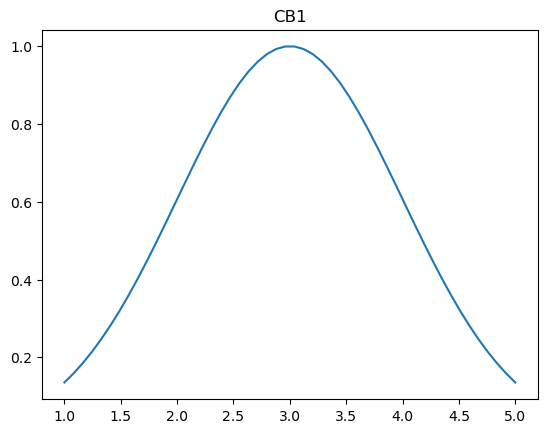

In [59]:
CB1_list=[]
x_list=np.linspace(1,5)
mu = 3
sigma=1
alpha=1
n=5
for i in x_list:
    CB1_list.append(CB1(i,mu,sigma,alpha,n))
plt.plot(x_list,CB1_list)
plt.title("CB1")
plt.show()

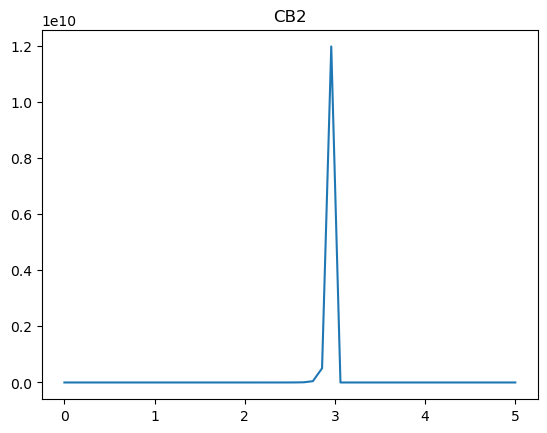

In [143]:
x_list=np.linspace(0,5)
alpha=1
alpha1=3
n=10
n1=20
mu=3
sigma=0.7
N=540
CB_list=CrystalBall2(x_list,mu,sigma,alpha,alpha1,n,n1,N)
plt.plot(x_list,CB_list)
plt.title("CB2")
plt.show()

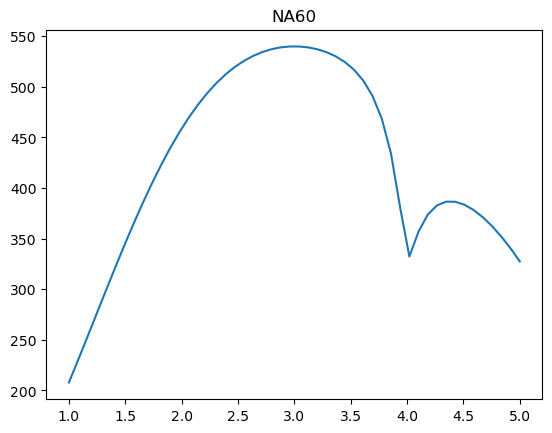

In [86]:
#NA60 
x_list_NA60=np.linspace(1,5)
NA60_list=[]
for i in x_list_NA60:
    NA60_list.append(NA60(i,3,1,1,1,1,1,1,1,1,1))
plt.plot(x_list_NA60,NA60_list)
plt.title("NA60")
plt.show()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f05c979b910>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

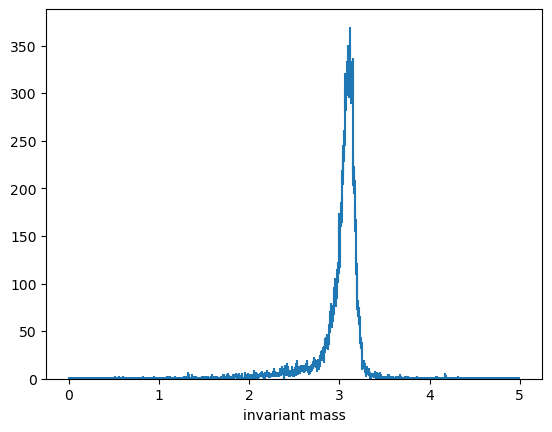

In [151]:
#Création des listes de données de l'histo des évènements reconstruits MC

vector.register_awkward() 

DATATYPE="mc"
assert((DATATYPE=="mc") or (DATATYPE=="data"))
BASEDIR="." # basedir where to look for runXXX.DATATYPE.root files
IS_MC=True if DATATYPE=="mc" else False

events = file["eventsTree"]
gen = file["genTree"]

def getTracks(events, gen):
    i = gen["Muon_GenMotherPDGCode"] == 443
    j = i[:,0]
    tracks = events[j]
    return ak.zip({
        "px":tracks["Muon_Px"],
                    "py":tracks["Muon_Py"],
                    "pz":tracks["Muon_Pz"],
                    "E":tracks["Muon_E"],
                    "charge":tracks["Muon_Charge"],
                    "thetaAbs":tracks["Muon_thetaAbs"],
                    "matched":tracks["Muon_matchedTrgThreshold"]},
                    with_name='Momentum4D')

def scan(dataDescription1, dataDescription2, 
              hMag:hist.Hist, hPhi:hist.Hist, hInvMass:hist.Hist,
              eventSelector=lambda x:[True]*len(x),
              trackSelector=lambda x:[True]*len(x),
              verbose:bool=False):
    """ Loop over data to fill the invariant mass histogram.
        
        :param: dataDescription: is anything uproot.iterate can take.
                typical something like run*.data.root:eventsTree in our case
        :param: eventSelector: returns an array of bool from an array of events
        :param: trackSelector: returns an array of bool from an array of tracks
    """
    
    for batch1, batch2 in zip(uproot.iterate(dataDescription1,
                                ["nMuons", "isCINT","isCMUL","isCMSL","Muon_Px","Muon_Py","Muon_Pz","Muon_E","Muon_Charge","Muon_thetaAbs","Muon_matchedTrgThreshold"],                                
                                 step_size="100 MB", report=True), 
                             uproot.iterate(dataDescription2,
                                ["nMuonsGen", "Muon_GenE", "Muon_GenPx", "Muon_GenPy", "Muon_GenPz", "Muon_GenLabel","Muon_GenMotherPDGCode"],                                
                                 step_size="100 MB", report=True)):
        events=batch1[0] # batch[1] is the report info
        gen=batch2[0]
        
        if len(events) < 1000:
            print("something is wrong",batch1[1], batch2[1]) # this is a protection for some corrupted input data files 
            break
            
        goodEvents = events[eventSelector(events)] 
        
        tracks = getTracks(events, gen)
        
        pairs = ak.combinations(tracks, 2)
        one, two = ak.unzip(pairs)
        
        opposite_charge_cut = one.charge + two.charge == 0
        
        quality_one = one[opposite_charge_cut]
        quality_two = two[opposite_charge_cut]
        invariant_mass = (one + two).mass
        
        hMag.fill(ak.flatten(tracks.p))
        hPhi.fill(ak.flatten(tracks.phi)) 
        hInvMass.fill(ak.flatten(invariant_mass))

        if verbose:
            print(batch1[1], "\n", batch2[1])

vhMagRaw = hist.Hist(hist.axis.Regular(bins=100,start=0,stop=100,name='$|p|$'))
vhPhiRaw = hist.Hist(hist.axis.Regular(bins=200,start=-22/7,stop=22/7,name='$\phi$'))
vhInvMass = hist.Hist(hist.axis.Regular(bins=500,start=0,stop=5,name='invariant mass'))
            
scan(dataDescription1=f"{BASEDIR}/run291694.{DATATYPE}.root:eventsTree",
     dataDescription2=f"{BASEDIR}/run291694.{DATATYPE}.root:genTree",
          hMag=vhMagRaw, hPhi=vhPhiRaw, hInvMass=vhInvMass,
          eventSelector=lambda x: x["isCMUL"]==True,
          trackSelector=lambda x: (x.eta>0))

vhInvMass.plot(label="J-Psi Only")

500 500


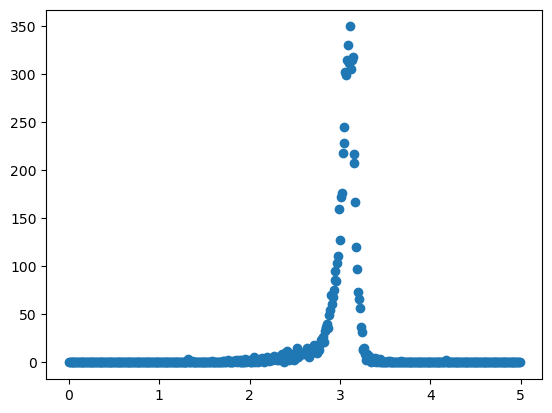

In [152]:
x_data=[]
y_data=[]

#print(vhInvMass)
#print(vhInvMass[22])
      
for i in range(0,500,1):
    x_data.append(i/100)
#print(x_data)


for i in vhInvMass:
      y_data.append(i)
#print(y_data)
print(len(x_data),len(y_data))

#plt.plot(x_data,y_data)
plt.scatter(x_data,y_data)
plt.show()

[ 3.0878954   0.0755521  60.42060865] [[ 8.02089725e-07 -2.44883294e-13  6.30849176e-14]
 [-2.44883294e-13  8.02089755e-07  3.20727019e-04]
 [ 6.30849176e-14  3.20727019e-04  3.84741802e-01]]


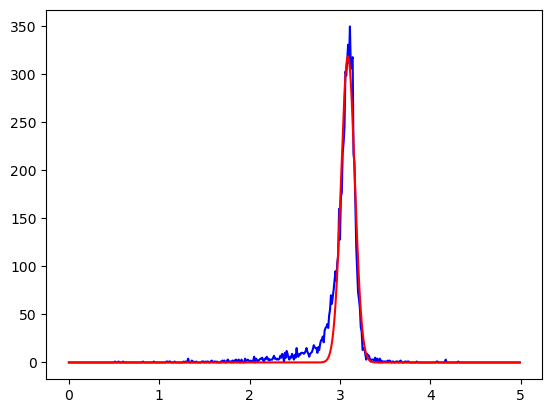

In [156]:
#fit avec gaussienne
popt_gauss, pcov_gauss = curve_fit(gauss, x_data, y_data, p0=[3,0.1,1])
print(popt_gauss,pcov_gauss)
mu_fit_gauss=popt_gauss[0]
sigma_fit_gauss=popt_gauss[1]
N_fit_gauss=popt_gauss[2]
y_data_fit_gauss=gauss(x_data,mu_fit_gauss,sigma_fit_gauss,N_fit_gauss)
plt.plot(x_data,y_data,'b')
plt.plot(x_data,y_data_fit_gauss,'r')
plt.show()

/tmp/ipykernel_3960/2792445290.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  C = n/abs(alpha)*1/(n-1)*np.exp(-abs(alpha)**2/2)
/home/leoboy/miniforge3/envs/qqbar2mumu/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[ 3.04836236 31.27479744  1.          1.        ] [[inf inf inf inf]
 [inf inf inf inf]
 [inf inf inf inf]
 [inf inf inf inf]]


ValueError: x and y must have same first dimension, but have shapes (500,) and (200,)

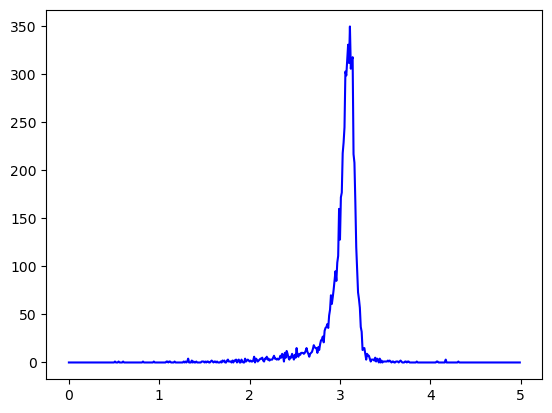

In [157]:
#fit crystall ball 1
#CB1(x,mu,sigma,alpha,n)
popt_CB1, pcov_CB1 = curve_fit(CB1, x_data, y_data,p0=[3,0.1,1,1])
print(popt_CB1,pcov_CB1)
mu_fit_CB1,sigma_fit_CB1,alpha_fit_CB1,n_fit_CB1 = popt_CB1
y_data_fit_CB1= CB1(x_data,mu_fit_CB1,sigma_fit_CB1,alpha_fit_CB1,n_fit_CB1)
plt.plot(x_data,y_data,'b')
plt.plot(x_data,y_data_fit,'r')
plt.show()

/home/leoboy/miniforge3/envs/qqbar2mumu/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[3.09477662 0.0457734  2.         4.         1.         1.
 1.         1.         1.         1.        ] [[inf inf inf inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf inf inf inf]]


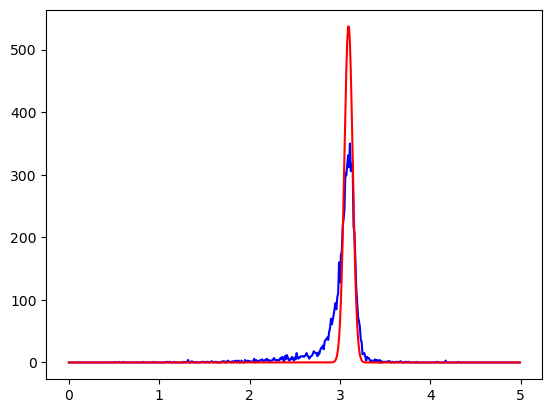

In [158]:
#fit avec NA60
#NA60(x,mu,sigma,alpha_L,alpha_R,p1_L,p1_R,p2_L,p2_R,p3_L,p3_R)
popt_NA60, pcov_NA60 = curve_fit(NA60, x_data, y_data,p0=[3,0.1,2,4,1,1,1,1,1,1])
print(popt_NA60,pcov_NA60)
mu_fit,sigma_fit,alpha_L_fit,alpha_R_fit,p1_L_fit,p1_R_fit,p2_L_fit,p2_R_fit,p3_L_fit,p3_R_fit = popt_NA60
y_data_fit= NA60(x_data,mu_fit,sigma_fit,alpha_L_fit,alpha_R_fit,p1_L_fit,p1_R_fit,p2_L_fit,p2_R_fit,p3_L_fit,p3_R_fit)
plt.plot(x_data,y_data,'b')
plt.plot(x_data,y_data_fit,'r')
plt.show()

/tmp/ipykernel_3960/44245727.py:24: RuntimeWarning: invalid value encountered in double_scalars
  y = np.append(y, A*((B- (i -mu)/(sigma))**(-n)))
/tmp/ipykernel_3960/44245727.py:26: RuntimeWarning: invalid value encountered in double_scalars
  y = np.append(y, C*((D- (i -mu)/(sigma))**(-nbis)))
/home/leoboy/miniforge3/envs/qqbar2mumu/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[nan nan nan nan nan nan nan] [[inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf]]


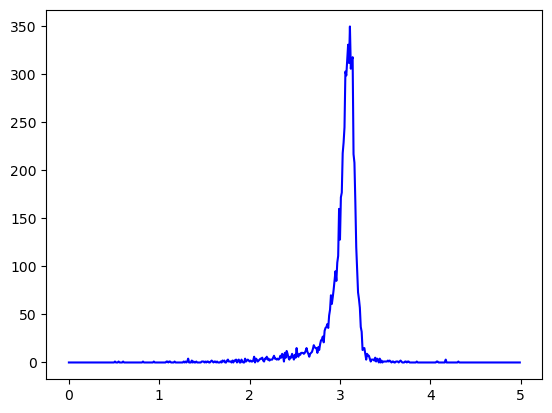

In [159]:
#fit avec crystall ball 2
#CrystalBall2(x, mu, sigma, alphabis, alpha, n, nbis, N)
popt_CB2, pcov_CB2 = curve_fit(CrystalBall2, x_data, y_data, p0=[3,0.1,2,4,1,1,1])
print(popt_CB2,pcov_CB2)
x_moy_fit,sigma_fit,alpha_fit,alpha1_fit,n_fit,n1_fit,N_fit = popt_CB2
y_data_fit=CrystalBall2(x_data,x_moy_fit,sigma_fit,alpha_fit,alpha1_fit,n_fit,n1_fit,N_fit) #premier argument : variable indépendante x
plt.plot(x_data,y_data,'b')
plt.plot(x_data,y_data_fit,'r')
plt.show()